# Dimensionality Reduction
En este script voy a probar reducción de dimensionalidad.\\
Una vez que logre correrlo para todo el sujeto 1, voy a crear nuevamente .npy files pero con mas variables de resumen (por ahora solo tengo min y mean, pero capaz otras vairbales serian mas informativas).\\
Tal vez puedo incluri también diferencias entre "pasado" y "futuro".
Tengo que lograr alguna representación que me permita separar entre high arousal y low arousal (o high valence y low valence)

In [1]:
import pandas as pd
import numpy as np
import os

# Aquí estarían los nombres de las columnas para los datos fisiológicos.
# Reemplaza esto con la lista que tienes.
column_names_all = ['ecg_cleaned_mean_p1', 'rr_signal_mean_p1', 'bvp_cleaned_mean_p1', 'gsr_cleaned_mean_p1', 'gsr_tonic_mean_p1', 'gsr_phasic_mean_p1', 'gsr_SMNA_mean_p1', 'rsp_cleaned_mean_p1', 'resp_rate_mean_p1', 'emg_zygo_cleaned_mean_p1', 'emg_coru_cleaned_mean_p1', 'emg_trap_cleaned_mean_p1', 'skt_filtered_mean_p1',
'ecg_cleaned_min_p1', 'rr_signal_min_p1', 'bvp_cleaned_min_p1', 'gsr_cleaned_min_p1', 'gsr_tonic_min_p1', 'gsr_phasic_min_p1', 'gsr_SMNA_min_p1', 'rsp_cleaned_min_p1', 'resp_rate_min_p1', 'emg_zygo_cleaned_min_p1', 'emg_coru_cleaned_min_p1', 'emg_trap_cleaned_min_p1', 'skt_filtered_min_p1',

'ecg_cleaned_mean_p2', 'rr_signal_mean_p2', 'bvp_cleaned_mean_p2', 'gsr_cleaned_mean_p2', 'gsr_tonic_mean_p2', 'gsr_phasic_mean_p2', 'gsr_SMNA_mean_p2', 'rsp_cleaned_mean_p2', 'resp_rate_mean_p2', 'emg_zygo_cleaned_mean_p2', 'emg_coru_cleaned_mean_p2', 'emg_trap_cleaned_mean_p2', 'skt_filtered_mean_p2',
'ecg_cleaned_min_p2', 'rr_signal_min_p2', 'bvp_cleaned_min_p2', 'gs`gsr_cleaned_min_p2', 'gsr_tonic_min_p2', 'gsr_phasic_min_p2', 'gsr_SMNA_min_p2', 'rsp_cleaned_min_p2', 'resp_rate_min_p2', 'emg_zygo_cleaned_min_p2', 'emg_coru_cleaned_min_p2', 'emg_trap_cleaned_min_p2', 'skt_filtered_min_p2',

'ecg_cleaned_mean_p3', 'rr_signal_mean_p3', 'bvp_cleaned_mean_p3', 'gsr_cleaned_mean_p3', 'gsr_tonic_mean_p3', 'gsr_phasic_mean_p3', 'gsr_SMNA_mean_p3', 'rsp_cleaned_mean_p3', 'resp_rate_mean_p3', 'emg_zygo_cleaned_mean_p3', 'emg_coru_cleaned_mean_p3', 'emg_trap_cleaned_mean_p3', 'skt_filtered_mean_p3',
'ecg_cleaned_min_p3', 'rr_signal_min_p3', 'bvp_cleaned_min_p3', 'gsr_cleaned_min_p3', 'gsr_tonic_min_p3', 'gsr_phasic_min_p3', 'gsr_SMNA_min_p3', 'rsp_cleaned_min_p3', 'resp_rate_min_p3', 'emg_zygo_cleaned_min_p3', 'emg_coru_cleaned_min_p3', 'emg_trap_cleaned_min_p3', 'skt_filtered_min_p3']


# Establecer las rutas a las carpetas de datos
physiology_dir = '../../data/preprocessed/scenario_1/train/physiology'
annotations_dir = '../../data/raw/scenario_1/train/annotations'

# Crear una lista vacía para guardar los dataframes
dataframes = []

# Para cada archivo de datos en la carpeta de fisiología
for file_name in os.listdir(physiology_dir):
    if file_name.startswith('sub_1_vid') and file_name.endswith('.npy'):

        # Extraer el número de video del nombre del archivo
        video_number = file_name.replace('sub_1_vid_', '').replace('.npy', '')

        # Construir las rutas completas de los archivos
        physiology_file = os.path.join(physiology_dir, file_name)
        annotations_file = os.path.join(annotations_dir, file_name)

        # Cargar los archivos .npy
        physiology_data = np.load(physiology_file, allow_pickle=True)
        annotations_data = np.load(annotations_file, allow_pickle=True)

        # Convertir a dataframes de pandas
        physiology_df = pd.DataFrame(physiology_data, columns=column_names_all)
        annotations_df = pd.DataFrame(annotations_data, columns=['arousal', 'valence'])

        # Realizar la unión de los datos
        merged_df = pd.concat([physiology_df, annotations_df], axis=1)

        # Agregar las columnas al inicio del dataframe con información del participante y número de video
        merged_df.insert(0, 'subject', 1)
        merged_df.insert(1, 'video', video_number)

        # Agregar el dataframe unido a la lista
        dataframes.append(merged_df)

# Concatenar todos los dataframes en uno solo
final_df = pd.concat(dataframes)

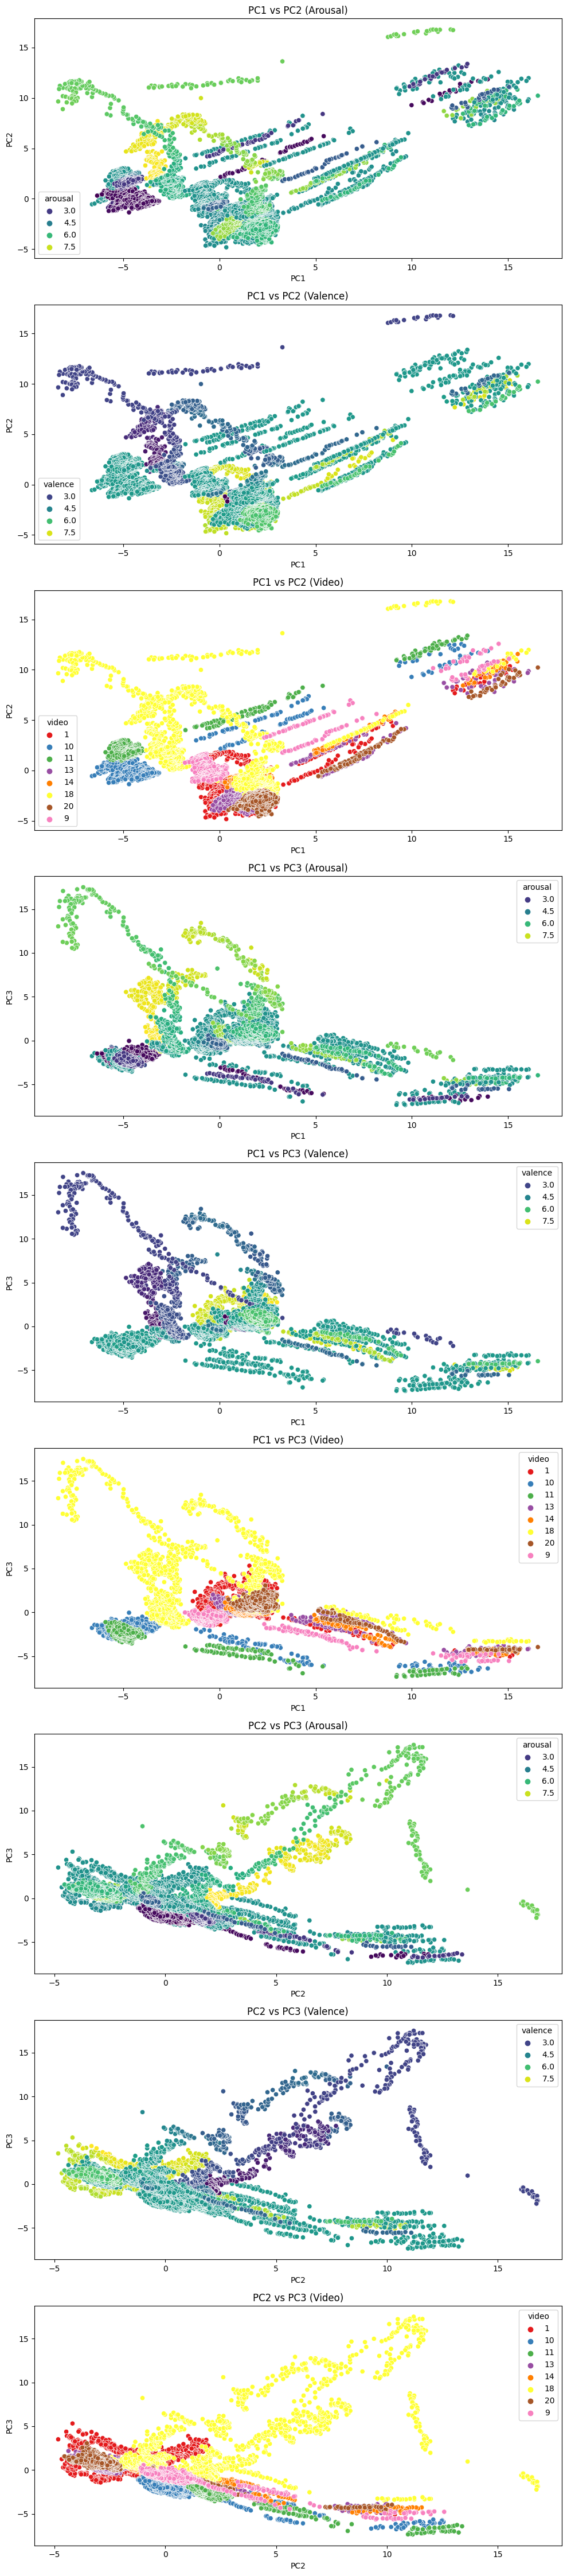

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Separar las columnas fisiológicas del dataframe
physio_df = final_df[column_names_all]

# Assume X is your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(physio_df)

# Ajustar PCA
pca = PCA(n_components=3)  # Establecer el número de componentes principales
principalComponents = pca.fit_transform(X_scaled)

# Crear el dataframe de componentes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

# Agregar las columnas arousal, valence, y video al dataframe principalDf
principalDf['arousal'] = final_df['arousal'].values
principalDf['valence'] = final_df['valence'].values
principalDf['video'] = final_df['video'].values

# Crear la figura para los gráficos
fig, ax = plt.subplots(9, figsize=(10, 45))

# Gráficos PC1 vs PC2
sns.scatterplot(x='PC1', y='PC2', hue='arousal', palette='viridis', data=principalDf, ax=ax[0])
ax[0].set_title('PC1 vs PC2 (Arousal)')

sns.scatterplot(x='PC1', y='PC2', hue='valence', palette='viridis', data=principalDf, ax=ax[1])
ax[1].set_title('PC1 vs PC2 (Valence)')

sns.scatterplot(x='PC1', y='PC2', hue='video', palette='Set1', data=principalDf, ax=ax[2])
ax[2].set_title('PC1 vs PC2 (Video)')

# Gráficos PC1 vs PC3
sns.scatterplot(x='PC1', y='PC3', hue='arousal', palette='viridis', data=principalDf, ax=ax[3])
ax[3].set_title('PC1 vs PC3 (Arousal)')

sns.scatterplot(x='PC1', y='PC3', hue='valence', palette='viridis', data=principalDf, ax=ax[4])
ax[4].set_title('PC1 vs PC3 (Valence)')

sns.scatterplot(x='PC1', y='PC3', hue='video', palette='Set1', data=principalDf, ax=ax[5])
ax[5].set_title('PC1 vs PC3 (Video)')

# Gráficos PC2 vs PC3
sns.scatterplot(x='PC2', y='PC3', hue='arousal', palette='viridis', data=principalDf, ax=ax[6])
ax[6].set_title('PC2 vs PC3 (Arousal)')

sns.scatterplot(x='PC2', y='PC3', hue='valence', palette='viridis', data=principalDf, ax=ax[7])
ax[7].set_title('PC2 vs PC3 (Valence)')

sns.scatterplot(x='PC2', y='PC3', hue='video', palette='Set1', data=principalDf, ax=ax[8])
ax[8].set_title('PC2 vs PC3 (Video)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Separar las columnas fisiológicas del dataframe
physio_df = final_df[column_names_all]

# Ajustar t-SNE
tsne = TSNE(n_components=2, random_state=0)  # Establecer el número de componentes principales
principalComponents = tsne.fit_transform(physio_df)

# Crear el dataframe de componentes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['TSNE1', 'TSNE2'])

# Agregar las columnas arousal, valence, y video al dataframe principalDf
principalDf['arousal'] = final_df['arousal'].values
principalDf['valence'] = final_df['valence'].values
principalDf['video'] = final_df['video'].values

# Crear la figura para los gráficos
fig, ax = plt.subplots(3, figsize=(10, 45))

# Gráficos TSNE1 vs TSNE2
sns.scatterplot(x='TSNE1', y='TSNE2', hue='arousal', palette='viridis', data=principalDf, ax=ax[0])
ax[0].set_title('TSNE1 vs TSNE2 (Arousal)')

sns.scatterplot(x='TSNE1', y='TSNE2', hue='valence', palette='viridis', data=principalDf, ax=ax[1])
ax[1].set_title('TSNE1 vs TSNE2 (Valence)')

sns.scatterplot(x='TSNE1', y='TSNE2', hue='video', palette='Set1', data=principalDf, ax=ax[2])
ax[2].set_title('TSNE1 vs TSNE2 (Video)')

# Save the figure
plt.tight_layout()
plt.savefig('tsne_plot.png', dpi=300)



<IPython.core.display.Javascript object>

In [13]:
# Establecer las rutas a las carpetas de datos
physiology_dir = '../../data/preprocessed/scenario_1/train/physiology'
annotations_dir = '../../data/raw/scenario_1/train/annotations'

# Crear una lista vacía para guardar los dataframes
dataframes = []

# Para cada archivo de datos en la carpeta de fisiología
for file_name in os.listdir(physiology_dir):
    if file_name.endswith('.npy'):

        # Extraer el número del participante y del video del nombre del archivo
        participant_number = file_name.split('_')[1]
        video_number = file_name.split('_')[3].replace('.npy', '')

        # Construir las rutas completas de los archivos
        physiology_file = os.path.join(physiology_dir, file_name)
        annotations_file = os.path.join(annotations_dir, file_name)

        # Cargar los archivos .npy
        physiology_data = np.load(physiology_file, allow_pickle=True)
        annotations_data = np.load(annotations_file, allow_pickle=True)

        # Convertir a dataframes de pandas
        physiology_df = pd.DataFrame(physiology_data, columns=column_names_all)
        annotations_df = pd.DataFrame(annotations_data, columns=['arousal', 'valence'])

        # Realizar la unión de los datos
        merged_df = pd.concat([physiology_df, annotations_df], axis=1)

        # Agregar las columnas al inicio del dataframe con información del participante y número de video
        merged_df.insert(0, 'subject', participant_number)
        merged_df.insert(1, 'video', video_number)

        # Agregar el dataframe unido a la lista
        dataframes.append(merged_df)

# Concatenar todos los dataframes en uno solo
final_df = pd.concat(dataframes)


In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Separar las columnas fisiológicas del dataframe
physio_df = final_df[column_names_all]

# Ajustar t-SNE
tsne = TSNE(n_components=2, random_state=0)  # Establecer el número de componentes principales
principalComponents = tsne.fit_transform(physio_df)

# Crear el dataframe de componentes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['TSNE1', 'TSNE2'])

# Agregar las columnas arousal, valence, video y subject al dataframe principalDf
principalDf['arousal'] = final_df['arousal'].values
principalDf['valence'] = final_df['valence'].values
principalDf['video'] = final_df['video'].values
principalDf['subject'] = final_df['subject'].values

# Crear la figura para los gráficos
fig, ax = plt.subplots(4, figsize=(10, 60))

# Gráficos TSNE1 vs TSNE2
sns.scatterplot(x='TSNE1', y='TSNE2', hue='arousal', palette='viridis', data=principalDf, ax=ax[0])
ax[0].set_title('TSNE1 vs TSNE2 (Arousal)')

sns.scatterplot(x='TSNE1', y='TSNE2', hue='valence', palette='viridis', data=principalDf, ax=ax[1])
ax[1].set_title('TSNE1 vs TSNE2 (Valence)')

sns.scatterplot(x='TSNE1', y='TSNE2', hue='video', palette='Set1', data=principalDf, ax=ax[2])
ax[2].set_title('TSNE1 vs TSNE2 (Video)')

sns.scatterplot(x='TSNE1', y='TSNE2', hue='subject', palette='Set2', data=principalDf, ax=ax[3])
ax[3].set_title('TSNE1 vs TSNE2 (Subject)')

# Save the figure
plt.tight_layout()
plt.savefig('tsne_plot_subject.png', dpi=300)


<IPython.core.display.Javascript object>

C:\Users\xochipilli\AppData\Local\Temp\ipykernel_4892\4112179920.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\xochipilli\AppData\Local\Temp\ipykernel_4892\4112179920.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('tsne_plot_subject.png', dpi=300)
